In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'  
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

%matplotlib inline 
mpl.rc('axes', unicode_minus=False)        # 마이너스('-') 폰트 깨지는 문제에 대한 대처

## 문제 1)

### 1.1

In [5]:
a = np.arange(0, 5, 0.5)
a

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

### 1.2

In [6]:
b = np.arange(1, 11,).reshape(2, 5)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

### 1.3

In [9]:
c = np.identity(3)
c


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 1.4

In [12]:
d = np.ones((4,4))
d

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### 1.5

In [13]:
e = np.arange(1, 25, 2).reshape(3, 4)
e

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

## 문제 2)

In [85]:
data = {
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990]
}

idxname = ['서울', '부산', '인천', '대구']

df = pd.DataFrame(data, index = idxname)
df.head()

,지역,2015,2010,2005,2000
서울,수도권,9904312,9631482,9762546,9853972
부산,경상권,3448737,3393191,3512547,3655437
인천,수도권,2890451,2632035,2517680,2466338
대구,경상권,2466052,2431774,2456016,2473990


In [86]:
df['2010-2015 증가율'] = round((df['2015'] - df['2010']) / df['2010'] , 4)  # (2014 - 2010) / 2010
df.head()

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0164
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


## 문제 3)

### 3.1

In [48]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
# 성별 인원수
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [34]:
# 선실별 인원수 
titanic.groupby('class')['survived'].count()

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

In [35]:
# 사망/생존 인원수 
titanic.groupby('alive')['survived'].count()

alive
no     549
yes    342
Name: survived, dtype: int64

### 3.2

In [49]:
bins = [1, 15, 30, 45, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

titanic['age_cat'] = pd.cut(titanic.age, bins, labels=labels)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,중년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,청년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년


In [50]:
age_ratio = titanic.groupby('age_cat')['age'].count() / titanic['age_cat'].count()
age_ratio

age_cat
미성년자    0.098571
청년      0.465714
중년      0.288571
장년      0.115714
노년      0.031429
Name: age, dtype: float64

## 문제 4)

### 4.1

In [52]:
tips = sns.load_dataset("tips") # 데이터 불러오기 
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [54]:
tips['tip_pct'] = round(tips['tip'] / tips['total_bill'], 2)  # 팁 비율 계산 
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10
243,18.78,3.00,Female,No,Thur,Dinner,2,0.16


In [61]:
tips.pivot_table('tip_pct', index='day').round(3)  # 피벗테이블 생성 

# 팁의 비율이 평균적으로 높은 날은 금요일 

,tip_pct
day,
Thur,0.161
Fri,0.169
Sat,0.154
Sun,0.167


## 문제 5)

### 5.1

In [2]:
import sqlite3

conn = sqlite3.connect('./test_3.db')  # 데이터베이스 접속

In [3]:
# 테이블 생성 
cur = conn.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS Eagles \
            (back_no INT NOT NULL, \
            name TEXT, \
            position TEXT,\
            PRIMARY KEY(back_no));')

### 5.2

In [ ]:
# 데이터 추가 

cur = conn.cursor()

cur.execute("INSERT INTO Eagles VALUES (8, '정근우', '내야수'), \
                                        (17, '안영명', '투수'), \
                                        (52, '김태균', '내야수'), \
                                        (43, '정은원', '내야수'), \
                                        (50, '이성열', '내야수')");
    
conn.commit()

### 5.3

In [9]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')  
cur.fetchall() # 모두 조회 

[(8, '정근우', '내야수'),
 (17, '안영명', '투수'),
 (52, '김태균', '내야수'),
 (43, '정은원', '내야수'),
 (50, '이성열', '내야수')]

### 5.4

In [11]:
cur = conn.cursor()
cur.execute("UPDATE Eagles SET position='외야수' WHERE back_no = 8;")
conn.commit()

cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')  
cur.fetchall() # 모두 조회 

[(8, '정근우', '외야수'),
 (17, '안영명', '투수'),
 (52, '김태균', '내야수'),
 (43, '정은원', '내야수'),
 (50, '이성열', '내야수')]

### 5.5

In [22]:
cur = conn.cursor()
cur.execute("DELETE FROM Eagles WHERE back_no = 52;")
conn.commit()

cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')  
cur.fetchall() # 모두 조회 

[(8, '정근우', '외야수'), (17, '안영명', '투수'), (43, '정은원', '내야수'), (50, '이성열', '내야수')]

## 문제 6)

In [82]:
x = np.linspace(-3, 3, 100)

def sigmoid(data):
    return 1 / (1 + np.exp(-data))

def diff_sigmoid(data):
    return sigmoid(data) * (1 - sigmoid(data))

In [83]:
sig = sigmoid(x)
diff_sig = diff_sigmoid(x)

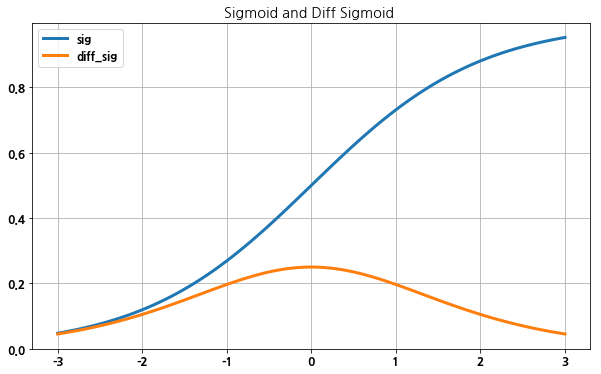

In [84]:
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10, 6))
plt.plot(x, sig, label = 'sig', lw=3)
plt.plot(x, diff_sig, label = 'diff_sig', lw=3)
plt.grid()
plt.title('Sigmoid and Diff Sigmoid ')
plt.legend(loc='best')
plt.show()

## 문제 7)

7.1 : 경사하강법  
7.2 : step size or learning rate  
7.3 : 퍼셉트론  
7.4 : relu  
7.5 : 은닉층(hidden layer)  

## 문제 8)

In [23]:
# 필요 라이브러리 

from keras.models import Sequential, load_model
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint, EarlyStopping  # 콜백
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder              # 문자열을 0, 1값으로 변환 
from sklearn.model_selection import train_test_split        # 학습셋 테스트셋 나누기

import os # 디렉토리 관련 라이브러리 
import numpy
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [67]:
# Seed값 설정 

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [68]:
# 데이터 불러오기 
df = pd.read_csv('dataset/iris.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [69]:
# 데이터 분류 

dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

In [70]:
# 학습셋, 테스트셋 나누기
# 테스트셋의 비율은 20%

X_train, X_test, Y_train_obj, Y_test_obj = train_test_split(X, Y_obj, test_size = 0.2, random_state=seed)

In [71]:
# 라벨 인코딩, 원-핫 인코딩 

e1 = LabelEncoder()
e2 = LabelEncoder()

e1.fit(Y_train_obj)
e2.fit(Y_test_obj)

Y_train = e1.transform(Y_train_obj) # 숫자로 변환 
Y_test = e2.transform(Y_test_obj)

Y_train_enc = np_utils.to_categorical(Y_train) # 원-핫 인코딩 
Y_test_enc = np_utils.to_categorical(Y_test)

In [72]:
# 좋은 모델 찾기 

model = Sequential()
model.add(Dense(16, input_dim = 4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))        # 다중분류에 사용되는 활성화 함수

model.compile(loss='categorical_crossentropy',  # 다중 분류 
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
# 그래프로 찾아보기 

history = model.fit(X_train, Y_train_enc, validation_split=0.1, epochs=2000, batch_size=10, verbose=0)
x_len = numpy.arange(len(y_acc))
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

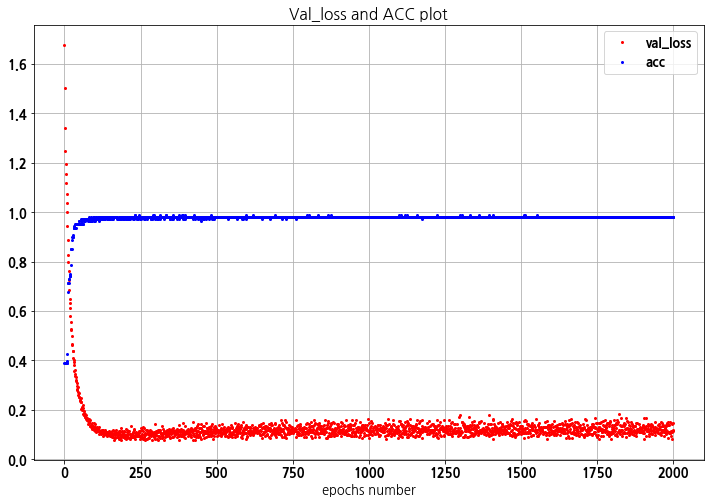

In [74]:
plt.rcParams["font.size"] = 13
plt.figure(figsize=(12, 8))
plt.title('Val_loss and ACC plot')
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='val_loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=2, label='acc')
plt.grid()
plt.xlabel('epochs number')
plt.legend(loc='best')
plt.show()

In [75]:
# 위 모델에서 epochs가 약 200가량 되었을 때 오차가 커지므로 epochs를 200으로 두고 모델 학습
# 단, 바로 model.fit을하면 안되고, 모델을 새로 정의한 후 모델을 학습시켜야함.
# 그렇지 않은경우 모델학습이 중복됨 

model = Sequential()
model.add(Dense(16, input_dim = 4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))        # 다중분류에 사용되는 활성화 함수

model.compile(loss='categorical_crossentropy',  # 다중 분류 
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train_enc, validation_split=0.1, epochs=200, batch_size=10, verbose=0)

In [76]:
# 모델학습결과 및 테스트셋의 예측률 

print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test_enc)[1]))

30/30 [==============================] - 0s 67us/step

 Accuracy : 1.0000


## 문제 9)

In [43]:
# 데이터 고정 

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [44]:
# 데이터 불러오기 

dataset = pd.read_csv('dataset/pima-indians-diabetes.csv', header=None)
X = dataset.values[:, 0:8]
Y = dataset.values[:, 8]

In [45]:
# 학습셋, 테스트셋 구분 
# 테스트셋의 비율은 25% 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=seed)

In [63]:
# 모델 설정 및 컴파일 

model = Sequential()

model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진분류에 사용하는 시그모이드 활성화 함수 

model.compile(loss='binary_crossentropy',  # 이진 분류 
             optimizer='adam',      
             metrics=['accuracy'])

In [64]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=2000, batch_size=100, verbose=0)

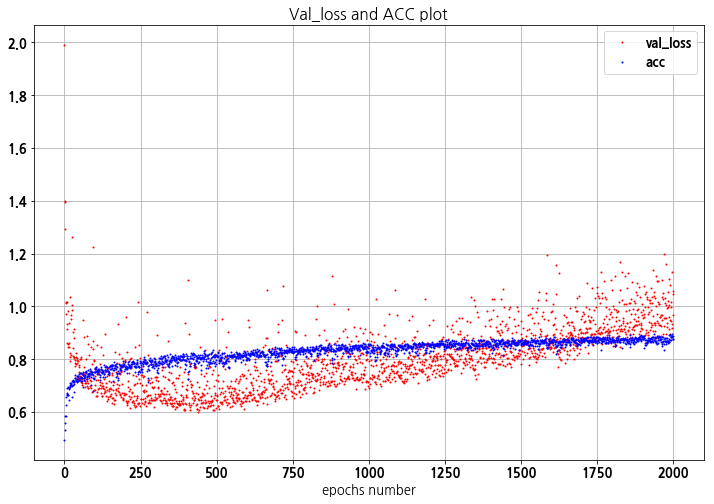

In [66]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = numpy.arange(len(y_acc))

plt.rcParams["font.size"] = 13
plt.figure(figsize=(12, 8))
plt.title('Val_loss and ACC plot')
plt.plot(x_len, y_vloss, 'o', c='red', markersize=1, label='val_loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=1, label='acc')
plt.grid()
plt.xlabel('epochs number')
plt.legend(loc='best')
plt.show()


In [53]:
# 위 그래프에서 적절한 epochs수가 200가량인것으로 판단하고, 다시 학습을 진행 

model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진분류에 사용하는 시그모이드 활성화 함수 

model.compile(loss='binary_crossentropy',  # 이진 분류 
             optimizer='adam',      
             metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.1, epochs=200, batch_size=100, verbose=0)

In [54]:
print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 예측률 68.75%

192/192 [==============================] - 0s 63us/step

 Accuracy : 0.6875
